- 기후데이터 : 평균상대습도, 최고기온, 최저기온, 일강수량, 평균풍속, 평균 전운량, 가조시간, 합계일사량
- 한국남동발전 - 영동에코발전본부 : 강원도 강릉시 강동면 염전길 99 
    - 시설용량325 MW

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
# Windows 한글
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
power1 = pd.read_csv("./DATA/한국남동발전㈜_태양광 발전 시간대별 발전량(영동)_20200630.csv", encoding='euc-kr')
power2 = pd.read_csv("./DATA/한국남동발전㈜_태양광 발전 시간대별 발전량(영동)_20191231.csv", encoding='euc-kr')
power3 = pd.read_csv("./DATA/한국남동발전㈜_태양광 발전 시간대별 발전량(영동)_20181231.csv", encoding='euc-kr')
power4 = pd.read_csv("./DATA/한국남동발전㈜_태양광 발전 시간대별 발전량(영동)_20171231.csv", encoding='euc-kr')
power = pd.concat([power1, power2,power3,power4])
weather = pd.read_csv("./DATA/날씨_강릉.csv", encoding='euc-kr')

In [6]:
weather = weather.iloc[:,2:]

In [7]:
power['호기'].unique()

array([1], dtype=int64)

In [8]:
power = power.drop(['호기', '구분'], axis=1) 
power['power'] = power.iloc[:,1:].sum(axis=1)
power = power[['년월일', 'power']]

In [9]:
df = pd.merge(weather, power, left_on='일시', right_on='년월일', how='inner')
df.drop(['년월일'], axis=1, inplace=True) 
df

,일시,최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10),power
0,2017-01-01,4.0,9.2,NaN,4.4,39.4,9.6,8.81,NaN,3177.792
1,2017-01-02,6.2,11.8,NaN,4.1,44.6,9.6,9.91,NaN,3618.240
2,2017-01-03,3.0,12.3,NaN,3.1,32.1,9.6,10.73,NaN,3918.432
3,2017-01-04,2.2,10.4,NaN,2.5,42.8,9.7,10.44,NaN,3805.824
4,2017-01-05,1.4,3.7,6.0,1.6,81.3,9.7,1.24,NaN,184.608
...,...,...,...,...,...,...,...,...,...,...
1272,2020-06-26,19.4,27.8,NaN,3.3,65.8,14.8,22.80,6.5,2889.312
1273,2020-06-27,23.0,30.6,0.1,1.7,61.4,14.8,16.75,6.6,2451.840
1274,2020-06-28,20.4,25.9,NaN,1.7,78.5,14.8,25.41,4.1,3044.832
1275,2020-06-29,19.6,25.1,2.2,1.8,85.4,14.8,9.26,8.6,1447.392


In [10]:
# df.to_csv('한국남동발전_영동.csv', index=False)
# pd.read_csv('한국남동발전_영동.csv')

In [12]:
df.isnull().sum()

일시                 0
최저기온(°C)           0
최고기온(°C)           0
일강수량(mm)         873
평균 풍속(m/s)         0
평균 상대습도(%)         0
가조시간(hr)           0
합계 일사량(MJ/m2)      0
평균 전운량(1/10)     579
power              0
dtype: int64

In [13]:
# 결측치 제거
df.dropna(axis=0, how='any', inplace=True)

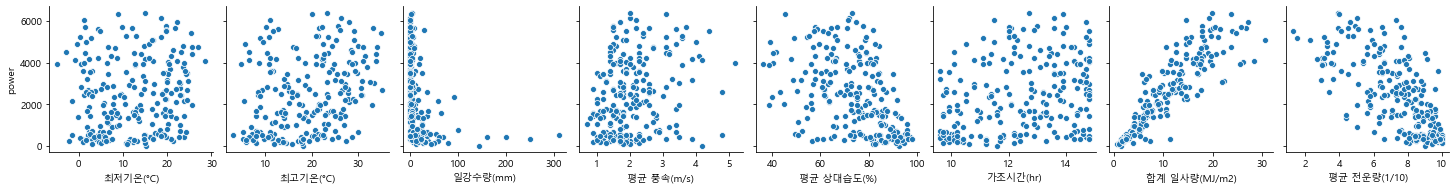

In [14]:
sns.pairplot(df, x_vars=['최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '평균 상대습도(%)',
       '가조시간(hr)', '합계 일사량(MJ/m2)', '평균 전운량(1/10)'],y_vars=['power'])

- 평균 전운량 음의 상관관계, 합계 일사량 양의 상관관계

In [15]:
from statsmodels.formula.api import ols

In [16]:
X = df.drop(['일시', 'power'], axis='columns')
y = df['power']
res = ols('y ~ X', data=df).fit()

In [17]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     148.3
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           2.04e-84
Time:                        18:42:56   Log-Likelihood:                -1828.3
No. Observations:                 230   AIC:                             3675.
Df Residuals:                     221   BIC:                             3706.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2384.3884    671.440      3.551      0.000    1061.144    3707.632
X[0]           4.1255     23.634      0.175      0.862     -42.451      50.702
X[1]           0.2412     23.548      0.010      0.992     -46.165      46.648
X[2]          -1.4600      1.715     -0.851      0.396      -4.840       1.920
X[3]          37.0610     81.209      0.456      0.649    -122.983     197.105
X[4]          -0.8995      5.742     -0.157      0.876     -12.215      10.416
X[5]         -56.6241     47.521     -1.192      0.235    -150.277      37.028
X[6]         198.7544     13.464     14.762      0.000     172.220     225.289
X[7]        -182.4008     34.931     -5.222      0.000    -251.242    -113.560
==============================================================================
Omnibus:                       21.605   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.376
Skew:                           0.350   Prob(JB):                     2.11e-13
Kurtosis:                       5.367   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 수정된 결정계수 확인 -> 모형의 적합도 확인 
    - Adj. R-squared: 0.837, Prob (F-statistic): 2.04e-84
    - 절편 : t값 3.551, P>|t|값 0.000
- 회귀계수확인 
    - p-value 0.05 이하 : 합계 일사량, 평균 전운량
- 다중공선성 확인

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
# y, X = dmatrices("방문빈도 ~" + features, data=data, return_type = "dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,43.0,최저기온(°C)
1,95.3,최고기온(°C)
2,1.7,일강수량(mm)
3,10.8,평균 풍속(m/s)
4,55.4,평균 상대습도(%)
5,137.9,가조시간(hr)
6,12.7,합계 일사량(MJ/m2)
7,31.3,평균 전운량(1/10)


- 독립변수 VIF값이 10 이상인 값이 서로 강한 상관관계를 가진다 
- => VIF값이 높은 컬럼 빼고 '일강수량(mm)', '평균 풍속(m/s)', '합계 일사량(MJ/m2)', '평균 전운량(1/10)' 으로만 회귀분석

In [20]:
X = df[['일강수량(mm)', '평균 풍속(m/s)', '합계 일사량(MJ/m2)', '평균 전운량(1/10)']]
y = df['power']
res = ols('y ~ X', data=df).fit()

In [21]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     299.2
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           8.12e-89
Time:                        18:42:56   Log-Likelihood:                -1829.2
No. Observations:                 230   AIC:                             3668.
Df Residuals:                     225   BIC:                             3686.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1855.3011    353.009      5.256      0.000    1159.674    2550.928
X[0]          -1.9523      1.454     -1.342      0.181      -4.818       0.913
X[1]          48.1006     64.383      0.747      0.456     -78.770     174.972
X[2]         190.4832      8.484     22.451      0.000     173.764     207.202
X[3]        -198.4287     31.237     -6.352      0.000    -259.983    -136.874
==============================================================================
Omnibus:                       19.446   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.745
Skew:                           0.288   Prob(JB):                     3.52e-12
Kurtosis:                       5.274   Cond. No.                         295.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,1.4,일강수량(mm)
1,5.6,평균 풍속(m/s)
2,3.3,합계 일사량(MJ/m2)
3,3.8,평균 전운량(1/10)
